<a href="https://colab.research.google.com/github/rootDevOps/coderhouse_data_science/blob/main/Segunda_Preentrega_ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Cars**

---



## **Abstract**

---

Actualmente el uso del automovil se a vuelto importante para la vida cotidiana y laboral; por tal motivo se requiere conocer en que momento y en que circuntancias es viable comprar un automovil para cuidar la salud financiera de las personas. 

Precisamente hacia esta directriz está encaminado el presente estudio. El estudio muestra el comportamiento de los precios a lo largo de los ultimos años, considerando factores como: modelo, fabricante, año, etc. para conocer a fondo la toma de decisiones de este caso de estudio.

En este proyecto se tratará de precedir el precio del próximo año 2023 en base a los datos obtenidos en el dataset.

Es importante mencionar que los datos obtenidos del dataset son de Estados Unidos de America.

## **Proyecto DS**
---



## **1.- Definir el Objetivo**
Diseñar un sistema que permita predecir el precio de un modelo de automóvil en el próximo año 2023.

## **2.- Contexto Comercial**

Actualmente el uso del automovil se a vuelto importante para la vida cotidiana y laboral; por tal motivo se requiere conocer en que momento y en que circuntancias es viable comprar un automovil para cuidar la salud financiera de las personas. 

Precisamente hacia esta directriz está encaminado el presente estudio. El estudio muestra el comportamiento de los precios a lo largo de los ultimos años, considerando factores como: modelo, fabricante, año, etc. para conocer a fondo la toma de decisiones de este caso de estudio.

## **3.- Problema Comercial**

* ¿Cuál será el precio de un modelo de automóvil en el año 2023?

## **4. Data Acquisition**
Los datos adquiridos son recopilación tipo **Third-Party Data** porque provienen de un website llamada kaggle, es una fuente de datos externa.

#### 4.1 Dataset - Used Cars
> 
> - enlace: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
>
> - columnas: 25
>
> - renglones: 426,881
>
> - tamaño: 1.45Gb

> ### Tipo de columnas
>
> - **id**: [INT] autoincrement
> - **url**: [STRING] URL del website	
> - **region**: [STRING] Region de la venta	
> - **region_url**: [STRING] Website de la venta	
> - **price**: [INT] Precio del automóvil usado	
> - **year**: [INT] Año de la venta	
> - **manufacturer**: [STRING] Fabricante 	
> - **model**: [STRING] Modelo	
> - **condition**: [STRING] Condición: Excellent, fair, good and new	
> - **cylinders**: [STRING] Números de cilindros	
> - **fuel**: [STRING] Gasolina: Diesel, electric, gas and hybrid	
> - **odometer**:	[INT] Odometro
> - **title_status**: [STRING] Estatus del automóvil: Clean, lien, missing, part only	
> - **transmission**: [STRING] Transmición: Automatic or manual	
> - **VIN**: [STRING] VIN
> - **drive**: [STRING] 4wd, fwd, rwd	
> - **size**: [STRING] Tamaño: Compact, Full-size, mid-size, sub-compact	
> - **type**: [STRING] Tipo: bus, pickup, van, etc	
> - **paint_color**: [STRING] Color	
> - **image_url**: [STRING] URL de la imagen	
> - **description**: [STRING] Descripción	
> - **county**: [STRING] País	
> - **state**: [STRING] Estado
> - **lat**: [STRING] Latitud
> - **long**:	[STRING] Longitud
> - **posting_date**: [STRING] Fecha de registro


## **5. Exploratory Data**

In [1]:
#librerias generales
import os
from timeit import default_timer as timer
import numpy as np
import pandas as pd 

#libreria matplotlib
import matplotlib.pyplot as plt
#liberia seaborn
import seaborn as sns

In [2]:
# Montando el drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Cursos/Courses - CoderHouse/Data Science/Proyecto/input/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Cursos/Courses - CoderHouse/Data Science/Proyecto/input


In [3]:
# Cargar archivo csv
df = pd.read_csv('./vehicles.csv', delimiter=',')
df.dataframeName = 'vehicles'
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
# Devuelve una tupla con el número de filas y columnas del DataFrame df.
df.shape

(426880, 26)

In [5]:
# Devuelve información (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) sobre el DataFrame df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
# Mostraremos las columnas null or NA del dataset
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

## **6. Data Wrangling**

In [7]:
# Validaremos si existen datos duplicados
# Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
df.duplicated().value_counts()

False    426880
dtype: int64

**Conclusión**: Determinamos que no existen renglones o registros duplicados

In [8]:
# Mostraremos datos con valores NAN (missing values)
# Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html
df.isna().sum().to_frame()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


In [9]:
# Corroboraremos los datos NAN con otro método similar al anterior
# Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
df.isnull().sum().to_frame()

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678


**Conclusión**: Se validó cuantos valores nulos existen en el dataset con isna() y isnull(). Podemos observar que el campo 'price' no contiene valores nulos, lo que nos indica que tiene valores consistentes. Se eliminará los registros que tengan NAN en el campo Year debido a que este campo deberia de estar con información para que sea útil para el análisis

In [10]:
# Eliminar missing values de Year de acuerdo a la conclusión.
df_clean = df[df['year'] > 0]
df_clean.isnull().sum().to_frame()

,0
id,0
url,0
region,0
region_url,0
price,0
year,0
manufacturer,16447
model,5209
condition,172909
cylinders,177591


In [11]:
# Las estadísticas descriptivas incluyen el resumen de la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN.
# Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df.describe(include=["object"]).T

,count,unique,top,freq
url,426880,426880,https://prescott.craigslist.org/cto/d/prescott...,1
region,426880,404,columbus,3608
region_url,426880,413,https://spokane.craigslist.org,2988
manufacturer,409234,42,ford,70985
model,421603,29667,f-150,8009
condition,252776,6,good,121456
cylinders,249202,8,6 cylinders,94169
fuel,423867,5,gas,356209
title_status,418638,6,clean,405117
transmission,424324,3,automatic,336524


**Conclusión**: Podemos observar que los datos unicos son congruentes a la información que se espera.

In [12]:
# ANálisaremos la columna posting_date para tranformarla
df.posting_date

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
426875    2021-04-04T03:21:31-0600
426876    2021-04-04T03:21:29-0600
426877    2021-04-04T03:21:17-0600
426878    2021-04-04T03:21:11-0600
426879    2021-04-04T03:21:07-0600
Name: posting_date, Length: 426880, dtype: object

In [13]:
# Agregaremos una nueva columna para obtener el formato de la columna 'posting_date'
df=df.dropna(subset=['posting_date'],axis=0)
df['posting_date_format'] = pd.to_datetime(df['posting_date'],utc=True).apply(lambda x: x.strftime('%B-%d')
if not pd.isnull(x) else '')
df['posting_date_format']

27          May-04
28          May-04
29          May-04
30          May-04
31          May-03
            ...   
426875    April-04
426876    April-04
426877    April-04
426878    April-04
426879    April-04
Name: posting_date_format, Length: 426812, dtype: object

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 5.2 MB/s 
     |████████████████████████████████| 30.5 MB 2.2 MB/s 
     |████████████████████████████████| 6.3 MB 30.3 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 


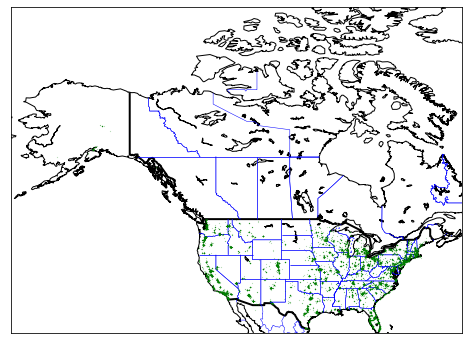

In [14]:
!pip install basemap
from mpl_toolkits.basemap import Basemap 
df_shuffled = df.sample(frac=1) 
df_shuffled.head()
plt.figure(figsize=(12,6)) 
map = Basemap(projection='mill',llcrnrlat = 25,llcrnrlon = -170,urcrnrlat = 80,
            urcrnrlon = -60,
            resolution='l')
map.drawcoastlines()
map.drawcountries(linewidth=2)
map.drawstates(color='b')
i = 0
for index, row in df_shuffled.iterrows():
    lat = row['lat']
    lon = row['long']
    xpt, ypt = map(lon, lat)
    map.plot(xpt,ypt,'.',markersize=0.2,c="green")
    # stopping criteria
    i = i + 1
    if (i == 15000): break

In [14]:
# validación de los campos
df2 = df.copy()
df2[['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size']]

,id,url,region_url,VIN,image_url,description,county,lat,long,posting_date,size
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org,3GTP1VEC4EG551563,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,32.590000,-85.480000,2021-05-04T12:31:18-0500,NaN
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org,1GCSCSE06AZ123805,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,32.590000,-85.480000,2021-05-04T12:31:08-0500,NaN
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org,3GCPWCED5LG130317,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,32.590000,-85.480000,2021-05-04T12:31:25-0500,NaN
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org,5TFRM5F17HX120972,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,32.590000,-85.480000,2021-05-04T10:41:31-0500,NaN
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,https://auburn.craigslist.org,NaN,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,32.592000,-85.518900,2021-05-03T14:02:03-0500,full-size
...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org,1N4AA6AV6KC367801,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,33.786500,-84.445400,2021-04-04T03:21:31-0600,NaN
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org,7JR102FKXLG042696,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,33.786500,-84.445400,2021-04-04T03:21:29-0600,NaN
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org,1GYFZFR46LF088296,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,33.779214,-84.411811,2021-04-04T03:21:17-0600,NaN
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,https://wyoming.craigslist.org,58ABK1GG4JU103853,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,33.786500,-84.445400,2021-04-04T03:21:11-0600,NaN


**Conclusión**: 

*   id: contiene un número consecutivo del registro, no es necesario para esté análisis
*   url: contiene la url del post donde se público la información del automóvil
*   region_url:: Dominio de la url de la públicaicón
*   VIN: ID del número del automóvil
*   image_url: Url de la imagen del automóvil
*   description: Descripción de la publicación
*   county: País donde se encuentra el automóvil
*   lat: Latitud de la publicación
*   long: Longitud de la publicación
*   posting_date: Fecha de la publicación en string
*   size: Tamaño del automóvil

Los campos anteriores no son aptos para predecir a primera instancia el precio de un automóvil, en la etapa de EDA podrémos obtener el análisis de las demás columnas y si son necesaria eliminarlas

In [15]:
#Eliminaremos las columnas que de acuerdo al análisis anterior no son aptas para este análisis
df2.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'region'], axis=1, inplace=True)

In [17]:
#Validaremos que se hayan eliminado las columnas lat, long y posting_date
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426812 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   region               426812 non-null  object 
 1   price                426812 non-null  int64  
 2   year                 425675 non-null  float64
 3   manufacturer         409234 non-null  object 
 4   model                421603 non-null  object 
 5   condition            252776 non-null  object 
 6   cylinders            249202 non-null  object 
 7   fuel                 423867 non-null  object 
 8   odometer             422480 non-null  float64
 9   title_status         418638 non-null  object 
 10  transmission         424324 non-null  object 
 11  drive                296313 non-null  object 
 12  type                 334022 non-null  object 
 13  paint_color          296677 non-null  object 
 14  state                426812 non-null  object 
 15  posting_date_for

In [16]:
# Obtendremos una copia del dataframe para un análisis posterior
df_original = df.copy()
df = df2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426812 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                426812 non-null  int64  
 1   year                 425675 non-null  float64
 2   manufacturer         409234 non-null  object 
 3   model                421603 non-null  object 
 4   condition            252776 non-null  object 
 5   cylinders            249202 non-null  object 
 6   fuel                 423867 non-null  object 
 7   odometer             422480 non-null  float64
 8   title_status         418638 non-null  object 
 9   transmission         424324 non-null  object 
 10  drive                296313 non-null  object 
 11  type                 334022 non-null  object 
 12  paint_color          296677 non-null  object 
 13  state                426812 non-null  object 
 14  posting_date_format  426812 non-null  object 
dtypes: float64(2), i

De acuerdo al analisis anterior de determina las variables independientes y la variable dependiente.

### Dependiente
* price: Cuantitativa continua

### Independiente
* year: Cuantitativa discreta	
* manufacturer: Cualitativa nominal	
* model: Cualitativa nominal
* condition: Cualitativa ordinal	
* cylinders: Cualitativa nominal
* fuel: Cualitativa	nominal
* odometer: Cuantitativa continua	
* title_status: Cualitativa nominal	
* transmission: Cualitativa nominal	
* drive: Cualitativa nominal	
* size: Cualitativa nominal	
* type: Cualitativa nominal	
* paint_color: Cualitativa nominal	
* county: Cualitativa nominal	
* state: Cualitativa nominal

### Otro
* id	
* url	
* region	
* region_url	
* VIN	
* image_url	
* description	
* lat
* long	
* posting_date

## 5.1.- Etapas del EDA



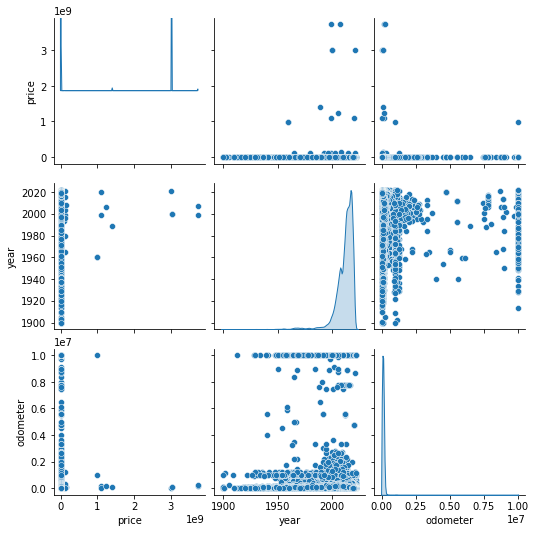

In [17]:
# Graficaremos las columnas para comprender los datos de las variables númericas
sns.pairplot(data = df, diag_kind = 'kde')

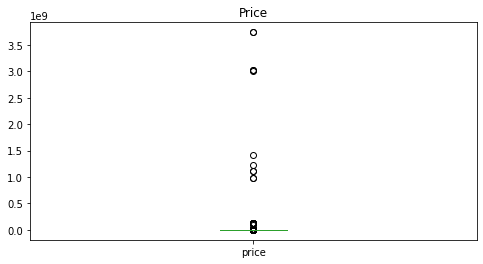

In [47]:
# Identificar los outlier
fig,ax=plt.subplots(figsize=(8,4))
df.price.plot(kind='box')
plt.title('Price')
plt.grid(False)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


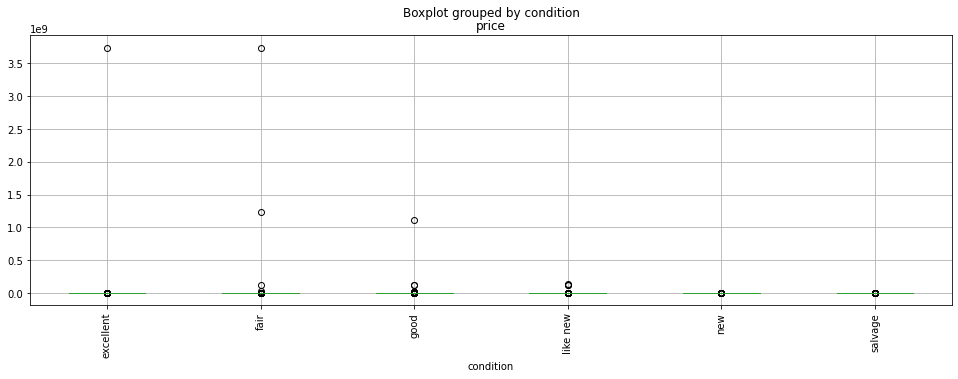

In [23]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','condition',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


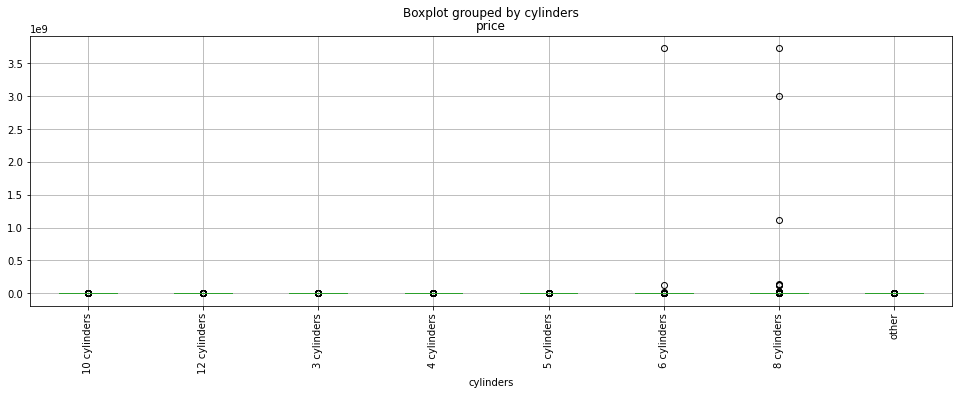

In [24]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','cylinders',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


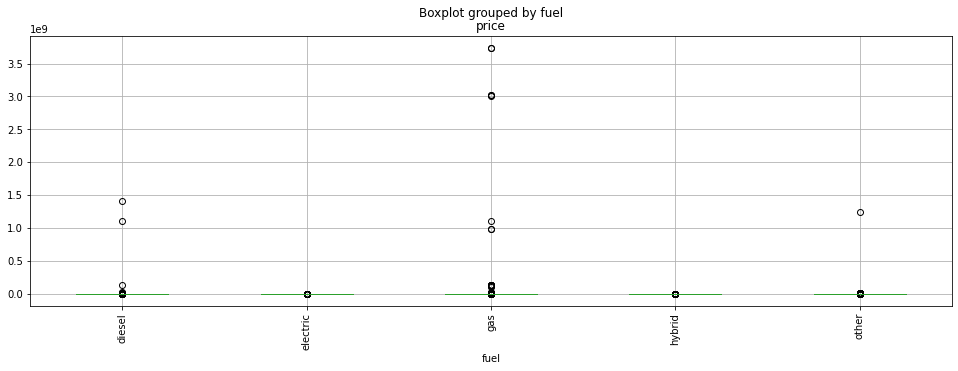

In [25]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','fuel',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


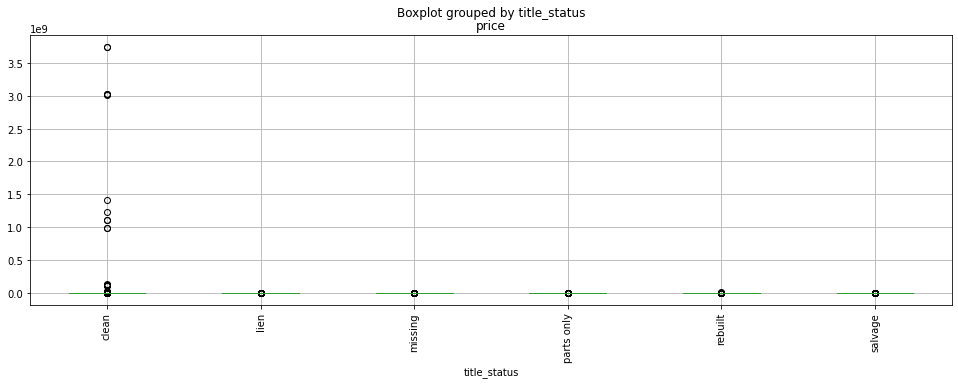

In [26]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','title_status',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


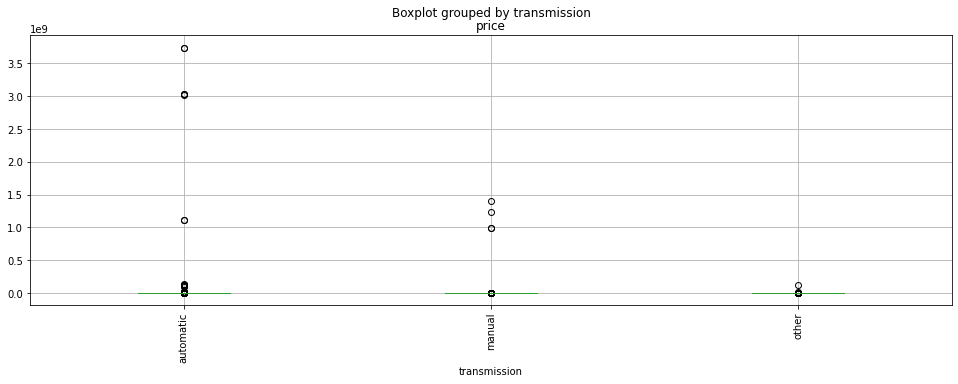

In [27]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','transmission',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


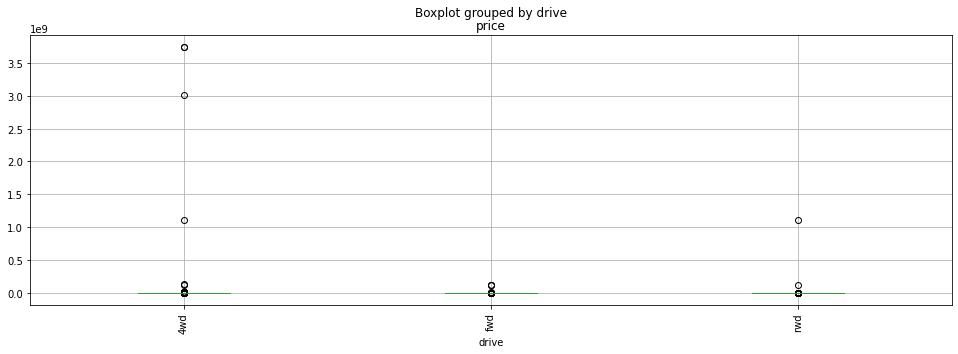

In [28]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','drive',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


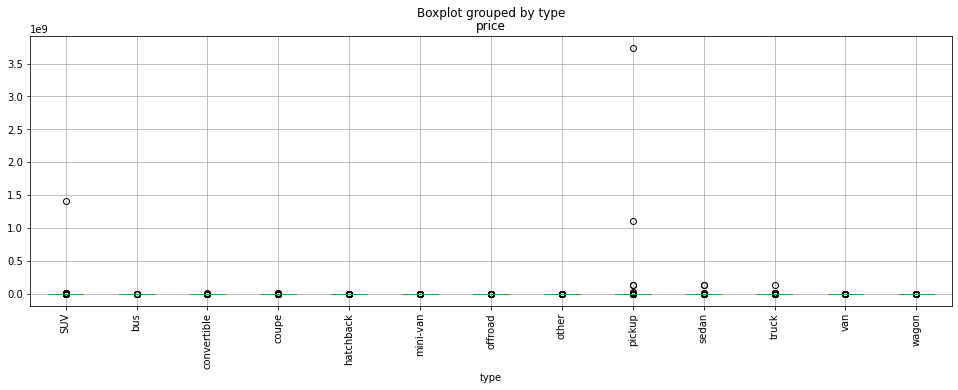

In [30]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','type',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


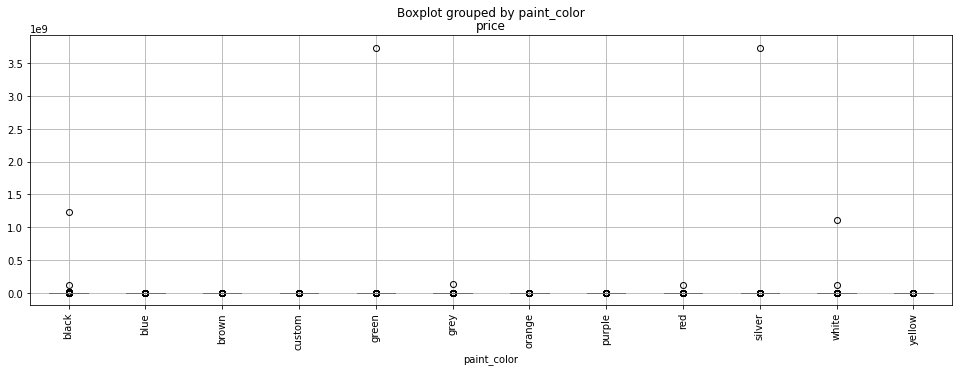

In [31]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','paint_color',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


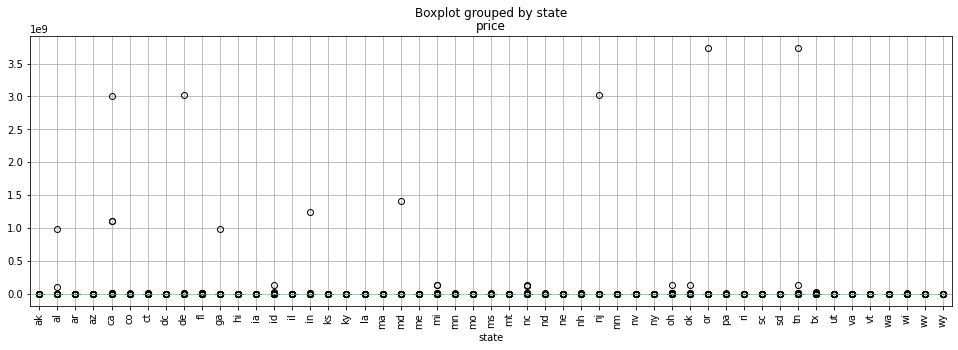

In [33]:
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','state',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

**Conclusión**: se análizaron los siguientes campos: manufacturer, model,condition,cylinders,fuel,title_status,transmission,drive, size,type,paint_color,county,state; donde se determino que los precios altos estan en: ford, toyota, chevrolet, nissan con precios mayores a 100,000,000.00USD.

Nota: No se valido la columna 'model' porque tienes muchos valores unicos y excedia el tiempo de respuesta.

In [35]:
df.loc[((df["price"] > 500000) & (df["price"] < 100000000))]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date_format
1838,dothan,99999999,1993.0,ford,ranger,NaN,NaN,gas,99999.0,clean,automatic,NaN,NaN,NaN,al,May-02
26075,fresno / madera,1111111,2014.0,chevrolet,NaN,NaN,NaN,other,11.0,clean,automatic,NaN,NaN,NaN,ca,April-30
68935,ventura county,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,clean,automatic,fwd,sedan,green,ca,April-06
79088,fort collins / north CO,655000,2010.0,chrysler,town & country,good,6 cylinders,gas,106000.0,clean,automatic,NaN,NaN,NaN,co,April-27
83367,eastern CT,1000000,2022.0,NaN,Any make any model,NaN,NaN,other,364747.0,clean,other,NaN,NaN,NaN,ct,April-11
87052,new haven,1000000,2019.0,NaN,Call for a free estimate,NaN,NaN,gas,12345.0,salvage,automatic,NaN,NaN,NaN,ct,April-17
91605,delaware,1000000,2022.0,NaN,Any make any model,NaN,NaN,other,364747.0,clean,other,NaN,NaN,NaN,de,April-19
91807,delaware,1000000,2022.0,NaN,Any make any model,NaN,NaN,other,364747.0,clean,other,NaN,NaN,NaN,de,April-11
95119,ft myers / SW florida,990000,2017.0,mercedes-benz,amg g 63,NaN,8 cylinders,gas,4085.0,clean,automatic,4wd,SUV,white,fl,April-24
105843,orlando,6995495,2014.0,dodge,journey,NaN,4 cylinders,gas,135888.0,clean,automatic,fwd,SUV,NaN,fl,April-29


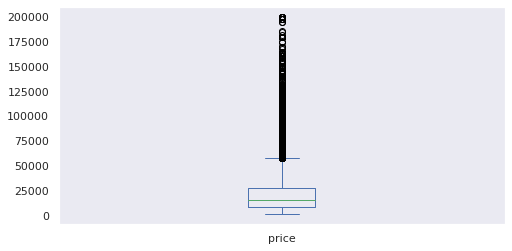

In [54]:
# Obtendremos el min y max de donde se concentran los precios
df1 = df.loc[(df.price >= 1_000) & (df.price <= 200_000)]
sns.set()
fig,(ax1)=plt.subplots(figsize=(8,4))
df1.price.plot(kind='box')
plt.grid(False)

In [53]:
df_clean = df[df['price'] > 0]
y = df_clean['price']
print(y.quantile(.05), y.quantile(.95))

1988.0 44999.0


In [49]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,posting_date_format
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,May-04
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,May-04
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al,May-04
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al,May-04
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,May-03


**Conclusión**: Deacuerdo al análisis individual y a la visualización individual, vamos a ocupar la mayor concentración de precios que se encuentra entre el 0.05Q y .95Q que corresponden  $1,988.00 - $44,999.00

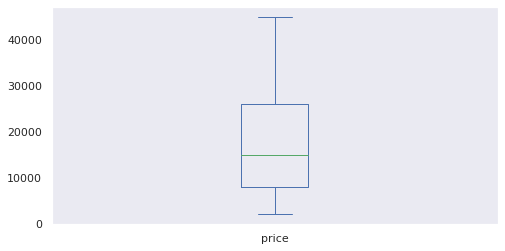

In [59]:
df_clean = df[df['price'] > 0]
y = df_clean['price']

df = df[(df['price'] > 1988) & (df['price'] < 44999) ]

sns.set()
fig,(ax1)=plt.subplots(figsize=(8,4))
df.price.plot(kind='box')
plt.grid(False)

### 5.2 Estadistica Descriptiva

In [61]:
# Mostraremos valores unicos
df["manufacturer"].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', nan, 'acura', 'hyundai', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'mini',
       'pontiac', 'fiat', 'tesla', 'mercury', 'saturn', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'ferrari', 'morgan'],
      dtype=object)

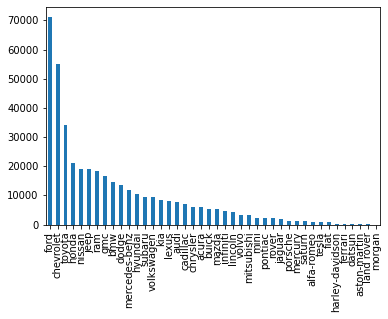

In [29]:
# Graficar cantidad de automóviles de acuerdo al manufacturer
df['manufacturer'].value_counts().plot.bar()

In [62]:
df["model"].unique()

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'silverado 1500 crew', ..., 'gand wagoneer', '96 Suburban',
       'Paige Glenbrook Touring'], dtype=object)

In [63]:
df["condition"].unique()

array(['good', 'excellent', 'fair', nan, 'like new', 'new', 'salvage'],
      dtype=object)

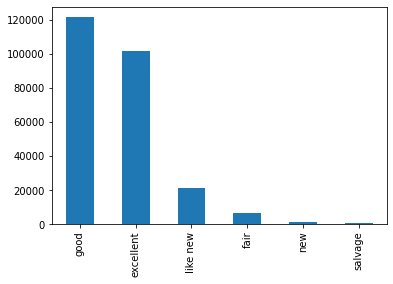

In [32]:
# Graficar cantidad de automóviles de acuerdo al condition
df['condition'].value_counts().plot.bar()

In [64]:
df["cylinders"].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       '3 cylinders', '10 cylinders', '12 cylinders', 'other'],
      dtype=object)

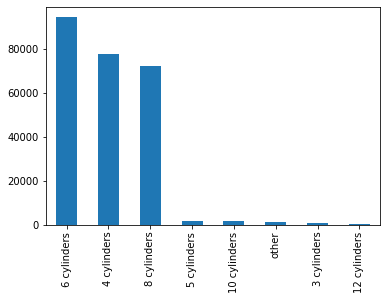

In [33]:
# Graficar cantidad de automóviles de acuerdo al cylinders
df['cylinders'].value_counts().plot.bar()

In [65]:
df["fuel"].unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

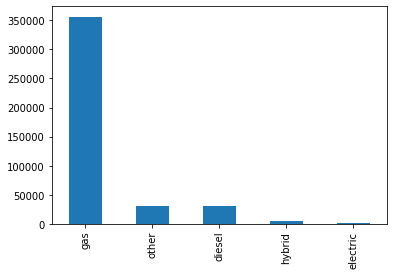

In [34]:
# Graficar cantidad de automóviles de acuerdo al fuel
df['fuel'].value_counts().plot.bar()

In [66]:
df["title_status"].unique()

array(['clean', 'rebuilt', 'lien', nan, 'salvage', 'missing',
       'parts only'], dtype=object)

In [67]:
df["transmission"].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [68]:
df["drive"].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

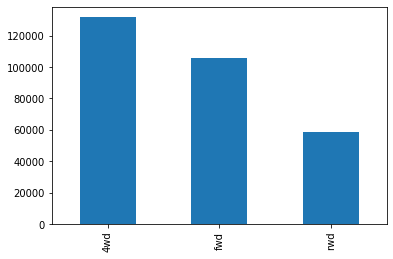

In [36]:
# Graficar cantidad de automóviles de acuerdo al drive
df['drive'].value_counts().plot.bar()

In [70]:
df["type"].unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'convertible', 'wagon',
       'van'], dtype=object)

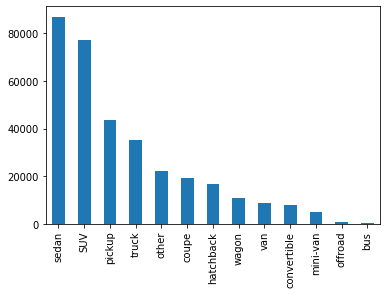

In [28]:
# Graficar cantidad de automóviles de acuerdo al type
df['type'].value_counts().plot.bar()

In [71]:
df["paint_color"].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', nan, 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

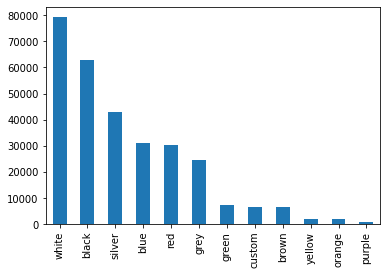

In [37]:
# Graficar cantidad de automóviles de acuerdo al paint_color
df['paint_color'].value_counts().plot.bar()

In [73]:
df["state"].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

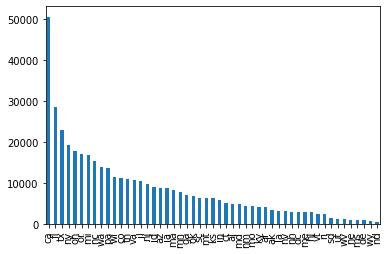

In [38]:
# Graficar cantidad de automóviles de acuerdo al state
df['state'].value_counts().plot.bar()

#### 5.2.1 Medidas de tendencia central
* **media** aritmética se define como la suma de N elementos dividida entre N. 
* **mediana** es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
* **moda** es el valor más repetido (solo aplicable a variables discretas).

In [46]:
df.describe()
# referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

,price,year,model,odometer,title_status
count,4.268120e+05,425675.000000,426812.000000,4.224800e+05,426812.000000
mean,7.520927e+04,2011.235191,16914.400113,9.804333e+04,0.236413
std,1.218325e+07,9.452120,7926.437734,2.138815e+05,1.070457
min,0.000000e+00,1900.000000,0.000000,0.000000e+00,0.000000
25%,5.900000e+03,2008.000000,11189.000000,3.770400e+04,0.000000
50%,1.395000e+04,2013.000000,17072.000000,8.554800e+04,0.000000
75%,2.648900e+04,2017.000000,24055.000000,1.335425e+05,0.000000
max,3.736929e+09,2022.000000,29667.000000,1.000000e+07,6.000000


In [74]:
# Analizamos con todos los datos
media = df["price"].mean()
mediana = df["price"].median()
moda = df["price"].mode().values[0]

print("Media: ", media)
print("Mediana: ", mediana)
print("Moda: ", moda)

Media:  17604.133160160938
Mediana:  15000.0
Moda:  6995


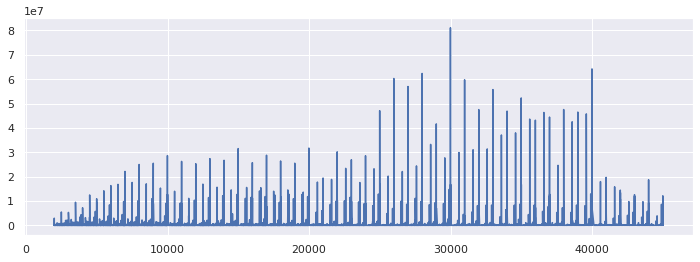

In [85]:
y = df[df["price"] > 0].groupby("price").price.sum()
x = y.index
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


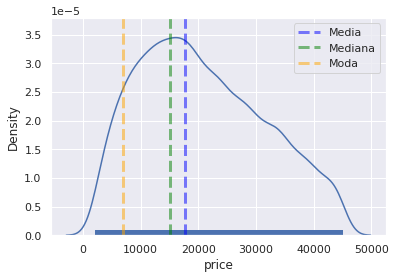

In [86]:
ax = sns.distplot(x, rug=True, hist=False)
ax.axvline(media, color='blue', linestyle='--', alpha=0.5,    linewidth=3, label='Media')
ax.axvline(mediana, color='green', linestyle='--', alpha=0.5,    linewidth=3, label='Mediana')
ax.axvline(moda, color='orange', linestyle='--', alpha=0.5,    linewidth=3, label='Moda')
ax.legend() 

**Conclusión**: Obtenemos una curva de asimetría positiva.

#### 5.2.2 Medidas de dispersión

* **varianza** es una de estas medidas de dispersión que se define como la media de las diferencias al cuadrado de los valores con respecto a la media
* **desviación estándar** es la raíz cuadrada de la varianza

In [87]:
varianza = df["price"].var() 
desviacion = df["price"].std()  

print("Varianza: ", varianza)
print("Desviación estándar: ", desviacion)

Varianza:  125697948.65643981
Desviación estándar:  11211.50965108802


* **rango** es la diferencia entre el máximo y el mínimo y el rango intercuartílico
* **IQR** es la diferencia entre el tercer y el primer cuartil.

In [89]:
rango = df["price"].max() - df["price"].min()
iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)

print("Rango: ", rango)
print("IQR: ", iqr)


Rango:  43008
IQR:  18009.0


### 5.3 Medidas de asimetría

Para saber si los datos estan repartidos de forma simétrica existen varios coeficientes: Pearson, Fisher, Bowley-Yule, etc

Para valores cercanos a 0, la variable es simétrica. Si es positiva tiene cola a la derecha y si es negativa tiene cola a la izquierda.

[Text(0, 0.5, 'Count vechicles'),
 Text(0.5, 0, 'years'),
 Text(0.5, 1.0, 'Fuel by year')]

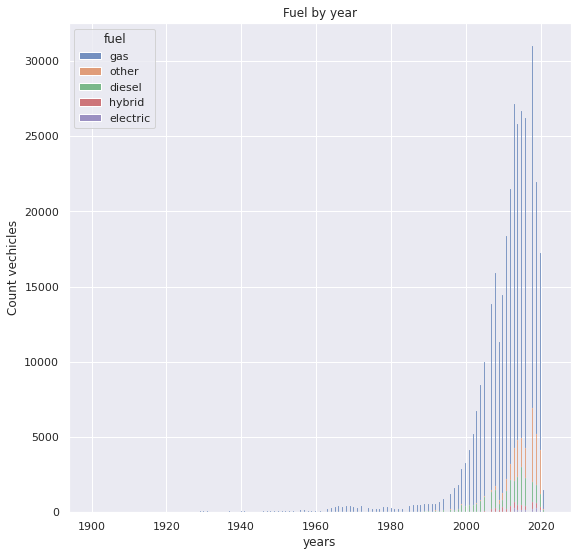

In [98]:
# Observaremos el comportamiento del número de autos vendidos por año con respecto al combustible
fig, ax = plt.subplots(figsize = (9, 9))
ax = sns.histplot(data=df, x="year", hue="fuel", multiple="stack")
ax.set(xlabel='years', ylabel='Count vechicles', title='Fuel by year')

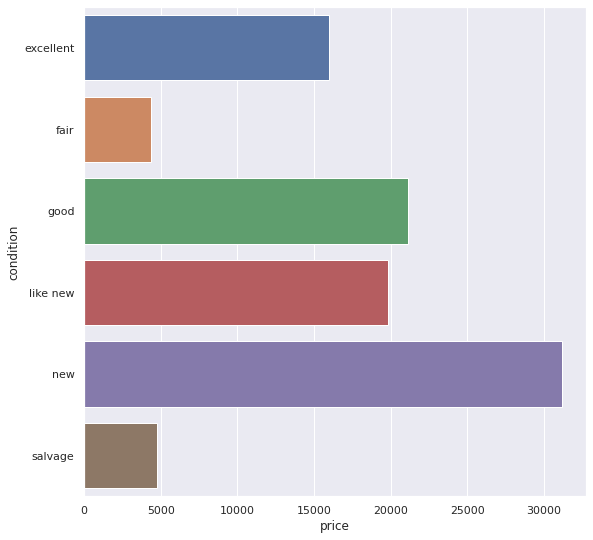

In [99]:
# Observamos los costos más altos o bajos de acuerdo a la condición 
condition_price = df.groupby('condition', as_index=False)['price'].mean().round()
fig, ax = plt.subplots(figsize = (9, 9))
sns.barplot(x='price', y='condition',data=condition_price, orient='h', ax=ax)

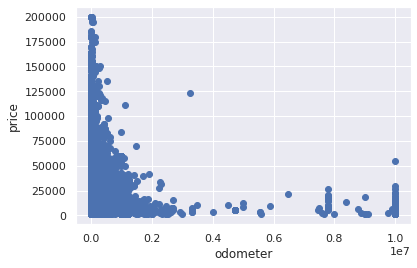

In [100]:
# Comportamiento del precio con respecto al odometer
y = df['price']
x = df['odometer']
plt.scatter(x, y)
plt.xlabel('odometer')
plt.ylabel('price')
plt.show()

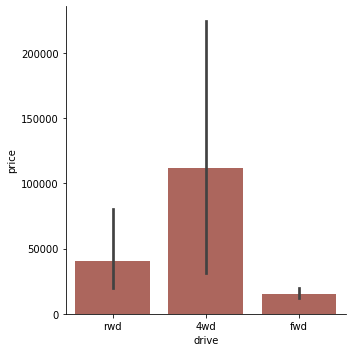

In [27]:
# Comportamiento de Drive con el Price
sns.catplot(x="drive", y="price",kind="bar",color="#B95C50", data=df)

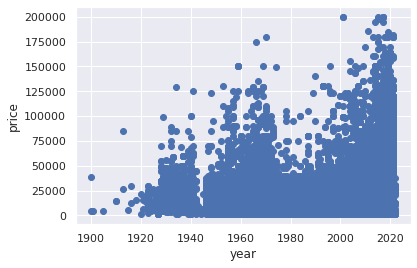

In [102]:
#Distribución del precio a lo largo de los años
y = df['price']
x = df['year']
plt.scatter(x, y)
plt.xlabel('year')
plt.ylabel('price')
plt.show()

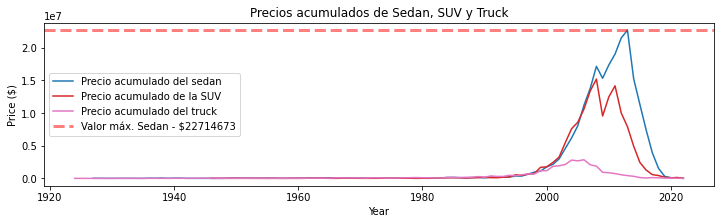

In [25]:
import operator

y_sedan = df[(df["price"] < 10000) & (df["type"] == "sedan")].groupby("year").price.sum()
y_suv = df[(df["price"] < 10000) & (df["type"] == "SUV")].groupby("year").price.sum()
y_truck = df[(df["price"] < 10000) & (df["type"] == "truck")].groupby("year").price.sum()

fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(y_sedan.index, y_sedan, label='Precio acumulado del sedan')
ax.plot(y_suv.index, y_suv, label='Precio acumulado de la SUV', color='C3')
ax.plot(y_truck.index, y_truck, label='Precio acumulado del truck', color='C6')


stats = {'Sedan':y_sedan.max(), 'SUV':y_suv.max(), 'Truck': y_truck.max()}
max_key = max(stats.items(), key=operator.itemgetter(1))[0]
ax.axhline(stats[max_key], color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Valor máx. {} - ${}'.format(max_key,stats[max_key]))

ax.set_xlabel('Year')  
ax.set_ylabel('Price ($)') 
ax.set_title('Precios acumulados de Sedan, SUV y Truck') 	
ax.legend() 


In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


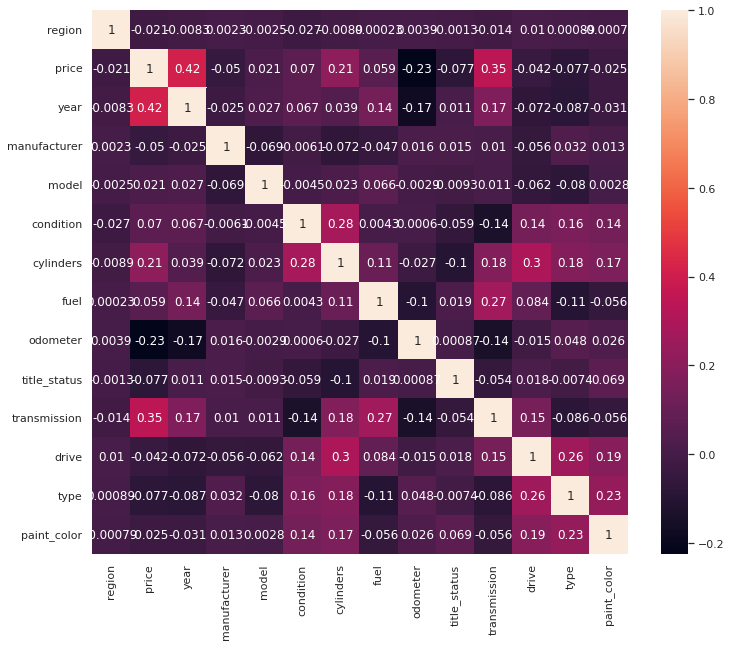

In [93]:
# Correlacion Pearson
le = preprocessing.LabelEncoder()
df[['region','condition','manufacturer','model','cylinders','fuel','title_status','transmission','drive','type','paint_color']] = df[['region','condition','manufacturer','model','cylinders','fuel','title_status','transmission','drive','type','paint_color']].apply(le.fit_transform)

from sklearn.preprocessing import MinMaxScaler

df["price"] = np.sqrt(preprocessing.minmax_scale(df["price"]))
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

De acuerdo al analisis anterior de determina las variables independientes y la variable dependiente.

### Dependiente
* price: Cuantitativa continua

### Independiente
* year: Cuantitativa discreta	
* manufacturer: Cualitativa nominal	
* model: Cualitativa nominal
* condition: Cualitativa ordinal	
* cylinders: Cualitativa nominal
* fuel: Cualitativa	nominal
* odometer: Cuantitativa continua	
* title_status: Cualitativa nominal	
* transmission: Cualitativa nominal	
* drive: Cualitativa nominal	
* size: Cualitativa nominal	
* type: Cualitativa nominal	
* paint_color: Cualitativa nominal	
* county: Cualitativa nominal	

### Columnas Eliminadas
* id	
* url	
* region	
* region_url	
* VIN	
* image_url	
* description	
* lat
* long	
* posting_date
* state

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380381 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   region               380381 non-null  object 
 1   price                380381 non-null  int64  
 2   year                 379276 non-null  float64
 3   manufacturer         365314 non-null  object 
 4   model                375983 non-null  object 
 5   condition            237068 non-null  object 
 6   cylinders            225199 non-null  object 
 7   fuel                 377849 non-null  object 
 8   odometer             378362 non-null  float64
 9   title_status         373882 non-null  object 
 10  transmission         378627 non-null  object 
 11  drive                265230 non-null  object 
 12  type                 299253 non-null  object 
 13  paint_color          271631 non-null  object 
 14  state                380381 non-null  object 
 15  posting_date_for